<a href="https://colab.research.google.com/github/HiebertDiogo/Paradigmas-de-ML/blob/main/Identificador%20de%20Les%C3%B5es.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prova II - Análise de Lesões de Mamas

Importação das Bibliotecas necessárias para o trabalho

In [ ]:
# APENAS EM CASO DE USAR OS MODELO CARREGADOS NO DRIVE
# CASO
# from google.colab import drive
# drive.mount('/content/drive')

import time
import joblib
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Mounted at /content/drive


CASO QUEIRA COMPILAR/**INTERPRETAR** USANDO OS ARQUIVOS DO DRIVE \
Comente ( Ctrl + A e Ctrl + / ) os locais indicados \

Para encontrar os locais indicados (Ctrl + F), busque por: \
COMENTE CASO USE O ARQUIVO DO DRIVE \
ALTERAR O MODO DE LEITURA, CASO USE O DRIVE

Todas as bibliotecas necessárias para a análise

In [ ]:
import scipy.cluster.hierarchy as sch
from sklearn.feature_selection import RFE
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LinearRegression
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import cross_val_score, cross_val_score, KFold, StratifiedKFold, GridSearchCV, train_test_split

from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.metrics import recall_score, precision_score, balanced_accuracy_score, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, f1_score, make_scorer, roc_auc_score, confusion_matrix, classification_report, roc_curve

In [ ]:
pd.set_option("display.max_rows", 5000)
pd.set_option("display.max_columns", 5000)

*USANDO O DRIVE, EDITE O PATH*

In [ ]:
file_url = "https://raw.githubusercontent.com/DayvisonGomes/radiomic_data/refs/heads/main/radiomic_data_binary.csv"

# USANDO O DRIVE, EDITE O PATH
path_drive = "/content/drive/MyDrive/Paradigmas de ML"

In [ ]:
df = pd.read_csv(file_url)
df.head()

,diagnostics_Versions_PyRadiomics,diagnostics_Versions_Numpy,diagnostics_Versions_SimpleITK,diagnostics_Versions_PyWavelet,diagnostics_Versions_Python,diagnostics_Configuration_Settings,diagnostics_Configuration_EnabledImageTypes,diagnostics_Image-original_Hash,diagnostics_Image-original_Dimensionality,diagnostics_Image-original_Spacing,diagnostics_Image-original_Size,diagnostics_Image-original_Mean,diagnostics_Image-original_Minimum,diagnostics_Image-original_Maximum,diagnostics_Mask-original_Hash,diagnostics_Mask-original_Spacing,diagnostics_Mask-original_Size,diagnostics_Mask-original_BoundingBox,diagnostics_Mask-original_VoxelNum,diagnostics_Mask-original_VolumeNum,diagnostics_Mask-original_CenterOfMassIndex,diagnostics_Mask-original_CenterOfMass,original_firstorder_10Percentile,original_firstorder_90Percentile,original_firstorder_Energy,original_firstorder_Entropy,original_firstorder_InterquartileRange,original_firstorder_Kurtosis,original_firstorder_Maximum,original_firstorder_MeanAbsoluteDeviation,original_firstorder_Mean,original_firstorder_Median,original_firstorder_Minimum,original_firstorder_Range,original_firstorder_RobustMeanAbsoluteDeviation,original_firstorder_RootMeanSquared,original_firstorder_Skewness,original_firstorder_TotalEnergy,original_firstorder_Uniformity,original_firstorder_Variance,original_glcm_Autocorrelation,original_glcm_ClusterProminence,original_glcm_ClusterShade,original_glcm_ClusterTendency,original_glcm_Contrast,original_glcm_Correlation,original_glcm_DifferenceAverage,original_glcm_DifferenceEntropy,original_glcm_DifferenceVariance,original_glcm_Id,original_glcm_Idm,original_glcm_Idmn,original_glcm_Idn,original_glcm_Imc1,original_glcm_Imc2,original_glcm_InverseVariance,original_glcm_JointAverage,original_glcm_JointEnergy,original_glcm_JointEntropy,original_glcm_MCC,original_glcm_MaximumProbability,original_glcm_SumAverage,original_glcm_SumEntropy,original_glcm_SumSquares,original_gldm_DependenceEntropy,original_gldm_DependenceNonUniformity,original_gldm_DependenceNonUniformityNormalized,original_gldm_DependenceVariance,original_gldm_GrayLevelNonUniformity,original_gldm_GrayLevelVariance,original_gldm_HighGrayLevelEmphasis,original_gldm_LargeDependenceEmphasis,original_gldm_LargeDependenceHighGrayLevelEmphasis,original_gldm_LargeDependenceLowGrayLevelEmphasis,original_gldm_LowGrayLevelEmphasis,original_gldm_SmallDependenceEmphasis,original_gldm_SmallDependenceHighGrayLevelEmphasis,original_gldm_SmallDependenceLowGrayLevelEmphasis,original_glrlm_GrayLevelNonUniformity,original_glrlm_GrayLevelNonUniformityNormalized,original_glrlm_GrayLevelVariance,original_glrlm_HighGrayLevelRunEmphasis,original_glrlm_LongRunEmphasis,original_glrlm_LongRunHighGrayLevelEmphasis,original_glrlm_LongRunLowGrayLevelEmphasis,original_glrlm_LowGrayLevelRunEmphasis,original_glrlm_RunEntropy,original_glrlm_RunLengthNonUniformity,original_glrlm_RunLengthNonUniformityNormalized,original_glrlm_RunPercentage,original_glrlm_RunVariance,original_glrlm_ShortRunEmphasis,original_glrlm_ShortRunHighGrayLevelEmphasis,original_glrlm_ShortRunLowGrayLevelEmphasis,original_glszm_GrayLevelNonUniformity,original_glszm_GrayLevelNonUniformityNormalized,original_glszm_GrayLevelVariance,original_glszm_HighGrayLevelZoneEmphasis,original_glszm_LargeAreaEmphasis,original_glszm_LargeAreaHighGrayLevelEmphasis,original_glszm_LargeAreaLowGrayLevelEmphasis,original_glszm_LowGrayLevelZoneEmphasis,original_glszm_SizeZoneNonUniformity,original_glszm_SizeZoneNonUniformityNormalized,original_glszm_SmallAreaEmphasis,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength,class
0,v3.0.1,1.25.2,2.4.0,1.7.0,3.11.9,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},245a9a4dd4a20aabe9c478e95a35aa833

In [ ]:
# Número de colunas
len(df.columns)

116

In [ ]:
# Número de Parâmetros
len(df)

2018

In [ ]:
display(df.dtypes)

,0
diagnostics_Versions_PyRadiomics,object
diagnostics_Versions_Numpy,object
diagnostics_Versions_SimpleITK,object
diagnostics_Versions_PyWavelet,object
diagnostics_Versions_Python,object
diagnostics_Configuration_Settings,object
diagnostics_Configuration_EnabledImageTypes,object
diagnostics_Image-original_Hash,object
diagnostics_Image-original_Dimensionality,object
diagnostics_Image-original_Spacing,object


In [ ]:
dupes = df.duplicated()
sum(dupes)

0

In [ ]:
# Verificação de Dados faltantes
df.isna().sum()

,0
diagnostics_Versions_PyRadiomics,0
diagnostics_Versions_Numpy,0
diagnostics_Versions_SimpleITK,0
diagnostics_Versions_PyWavelet,0
diagnostics_Versions_Python,0
diagnostics_Configuration_Settings,0
diagnostics_Configuration_EnabledImageTypes,0
diagnostics_Image-original_Hash,0
diagnostics_Image-original_Dimensionality,0
diagnostics_Image-original_Spacing,0


*Guardando Target e realizando Encoding*

In [ ]:
le = LabelEncoder()

# Guardando nosso atributo Target
y = df['class']

# Realizando o Label Encoding do Target, pois possui apenas duas classes
y = le.fit_transform(y)

## Remoção de Atributos

### Remoção de Atributos Objeto desnecessários

In [ ]:
col_obj = df.select_dtypes(include=["object"]).columns
col_obj

Index(['diagnostics_Versions_PyRadiomics', 'diagnostics_Versions_Numpy',
       'diagnostics_Versions_SimpleITK', 'diagnostics_Versions_PyWavelet',
       'diagnostics_Versions_Python', 'diagnostics_Configuration_Settings',
       'diagnostics_Configuration_EnabledImageTypes',
       'diagnostics_Image-original_Hash',
       'diagnostics_Image-original_Dimensionality',
       'diagnostics_Image-original_Spacing', 'diagnostics_Image-original_Size',
       'diagnostics_Mask-original_Hash', 'diagnostics_Mask-original_Spacing',
       'diagnostics_Mask-original_Size',
       'diagnostics_Mask-original_BoundingBox',
       'diagnostics_Mask-original_CenterOfMassIndex',
       'diagnostics_Mask-original_CenterOfMass', 'class'],
      dtype='object')

*A parte **comentada** serviu para a análise dos atributos tipo objeto*

In [ ]:
# # Observando a Redundância de atributos (Exemplo)

# red = df['diagnostics_Mask-original_CenterOfMass'].value_counts() == df['diagnostics_Mask-original_CenterOfMassIndex'].value_counts()
# display(red)

# # Analisando os valores dos atributos objeto
# col_obj = df.select_dtypes(include=["object"]).columns

# for col in col_obj:
#   display(df[col].value_counts())

df.describe(include='O')

,diagnostics_Versions_PyRadiomics,diagnostics_Versions_Numpy,diagnostics_Versions_SimpleITK,diagnostics_Versions_PyWavelet,diagnostics_Versions_Python,diagnostics_Configuration_Settings,diagnostics_Configuration_EnabledImageTypes,diagnostics_Image-original_Hash,diagnostics_Image-original_Dimensionality,diagnostics_Image-original_Spacing,diagnostics_Image-original_Size,diagnostics_Mask-original_Hash,diagnostics_Mask-original_Spacing,diagnostics_Mask-original_Size,diagnostics_Mask-original_BoundingBox,diagnostics_Mask-original_CenterOfMassIndex,diagnostics_Mask-original_CenterOfMass,class
count,2018,2018,2018,2018,2018,2018,2018,2018,2018,2018,2018,2018,2018,2018,2018,2018,2018,2018
unique,1,1,1,1,1,1,1,2018,1,1,1,1841,1,1,1841,11,11,2
top,v3.0.1,1.25.2,2.4.0,1.7.0,3.11.9,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},8a4ca70d74c31cb95bd1e558c2582c29a1cfed32,2D,"(1.0, 1.0)","(512, 512)",3193df8317a3e92b4bad87cb9d9228fc6a94b3ae,"(1.0, 1.0)","(512, 512)","(183, 183, 145, 145)","(255.0, 255.0)","(255.0, 255.0)",BENIGN
freq,2018,2018,2018,2018,2018,2018,2018,1,2018,2018,2018,5,2018,2018,5,974,974,1100


In [ ]:
# Após verificar os dados objeto, foi decidido remove-los para a nossa análise,
# pois eles não indicam relevancia para a classificação da Lesão
df.drop(columns=col_obj, inplace=True)

In [ ]:
df.describe()

,diagnostics_Image-original_Mean,diagnostics_Image-original_Minimum,diagnostics_Image-original_Maximum,diagnostics_Mask-original_VoxelNum,diagnostics_Mask-original_VolumeNum,original_firstorder_10Percentile,original_firstorder_90Percentile,original_firstorder_Energy,original_firstorder_Entropy,original_firstorder_InterquartileRange,original_firstorder_Kurtosis,original_firstorder_Maximum,original_firstorder_MeanAbsoluteDeviation,original_firstorder_Mean,original_firstorder_Median,original_firstorder_Minimum,original_firstorder_Range,original_firstorder_RobustMeanAbsoluteDeviation,original_firstorder_RootMeanSquared,original_firstorder_Skewness,original_firstorder_TotalEnergy,original_firstorder_Uniformity,original_firstorder_Variance,original_glcm_Autocorrelation,original_glcm_ClusterProminence,original_glcm_ClusterShade,original_glcm_ClusterTendency,original_glcm_Contrast,original_glcm_Correlation,original_glcm_DifferenceAverage,original_glcm_DifferenceEntropy,original_glcm_DifferenceVariance,original_glcm_Id,original_glcm_Idm,original_glcm_Idmn,original_glcm_Idn,original_glcm_Imc1,original_glcm_Imc2,original_glcm_InverseVariance,original_glcm_JointAverage,original_glcm_JointEnergy,original_glcm_JointEntropy,original_glcm_MCC,original_glcm_MaximumProbability,original_glcm_SumAverage,original_glcm_SumEntropy,original_glcm_SumSquares,original_gldm_DependenceEntropy,original_gldm_DependenceNonUniformity,original_gldm_DependenceNonUniformityNormalized,original_gldm_DependenceVariance,original_gldm_GrayLevelNonUniformity,original_gldm_GrayLevelVariance,original_gldm_HighGrayLevelEmphasis,original_gldm_LargeDependenceEmphasis,original_gldm_LargeDependenceHighGrayLevelEmphasis,original_gldm_LargeDependenceLowGrayLevelEmphasis,original_gldm_LowGrayLevelEmphasis,original_gldm_SmallDependenceEmphasis,original_gldm_SmallDependenceHighGrayLevelEmphasis,original_gldm_SmallDependenceLowGrayLevelEmphasis,original_glrlm_GrayLevelNonUniformity,original_glrlm_GrayLevelNonUniformityNormalized,original_glrlm_GrayLevelVariance,original_glrlm_HighGrayLevelRunEmphasis,original_glrlm_LongRunEmphasis,original_glrlm_LongRunHighGrayLevelEmphasis,original_glrlm_LongRunLowGrayLevelEmphasis,original_glrlm_LowGrayLevelRunEmphasis,original_glrlm_RunEntropy,original_glrlm_RunLengthNonUniformity,original_glrlm_RunLengthNonUniformityNormalized,original_glrlm_RunPercentage,original_glrlm_RunVariance,original_glrlm_ShortRunEmphasis,original_glrlm_ShortRunHighGrayLevelEmphasis,original_glrlm_ShortRunLowGrayLevelEmphasis,original_glszm_GrayLevelNonUniformity,original_glszm_GrayLevelNonUniformityNormalized,original_glszm_GrayLevelVariance,original_glszm_HighGrayLevelZoneEmphasis,original_glszm_LargeAreaEmphasis,original_glszm_LargeAreaHighGrayLevelEmphasis,original_glszm_LargeAreaLowGrayLevelEmphasis,original_glszm_LowGrayLevelZoneEmphasis,original_glszm_SizeZoneNonUniformity,original_glszm_SizeZoneNonUniformityNormalized,original_glszm_SmallAreaEmphasis,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
count,2018.000000,2018.0,2018.0,2018.000000,2018.000000,2018.000000,2018.000000,2.018000e+03,2018.000000,2018.000000,2018.000000,2018.0,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2.018000e+03,2018.000000,2.018000e+03,2.018000e+03,2.018000e+03,2.018000e+03,2.018000e+03,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2.018000e+03,2018.000000,2.018000e+03,2018.000000,2018.000000,2018.000000,2.018000e+03,2018.0000

### Remoção/Redução de Atributos Numéricos

#### Utilizando RFE

*COMENTE CASO USE O ARQUIVO DO DRIVE* (SUGIRO)

In [ ]:
# Cross-validation com 5 divisões;
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

# Seleciona todas as features
hyper_params = [{'n_features_to_select': list(range(1, len(df)+1))}]

# Aplicação do Grid Search no modelo, usando Regressão Linear, pois é uma boa solução
# para tabalhar com valores numéricos
lm = LinearRegression()
rfe = RFE(lm)

# Chame o GridSearchCV(). O parâmetro "return_train_score = True" Garante que a pontuação do treino
# seja retornada junto com a do teste
model_cv = GridSearchCV(estimator= rfe, param_grid = hyper_params, scoring= 'neg_mean_squared_error',
                        cv = folds, verbose = 1, return_train_score=True)

# Fita o modelo
%time model_cv.fit(df, y)

# Salvar o modelo ajustado para fazer uso novamente
joblib.dump(model_cv, 'rfe_gridsearch_model.pkl')

Fitting 5 folds for each of 2018 candidates, totalling 10090 fits


Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_rfe.py:300: UserWarning: Found n_features_to_select=1519 > n_features=98. There will be no feature selection and all features will be kept.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_rfe.py:300: UserWarning: Found n_features_to_select=1519 > n_features=98. There will be no feature selection and all features will be kept.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_rfe.py:300: UserWarning: Found n_features_to_select=1519 > n_features=98. There will be no feature selection and all features will be kept.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_rfe.py:300: UserWarning: Found n_features_to_select=1519 > n_features=98. There will be no feature selection and all features will be kept.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/featu

CPU times: user 17min 15s, sys: 4.24 s, total: 17min 19s
Wall time: 12min 5s


['rfe_gridsearch_model.pkl']

ALTERAR O MODO DE LEITURA, CASO USE O DRIVE

In [ ]:
# Leitura do Arquivo
model_cv = joblib.load('rfe_gridsearch_model.pkl')

# # Leitura do Arquivo no Drive
# model_cv = joblib.load(f'{path_drive}/rfe_gridsearch_model.pkl')

# Obtem o melhor número de atributos selecionados
print("Melhor número de atributos:", model_cv.best_params_['n_features_to_select'])

# Quanto mais próximo o erro for de 0, melhor
mse = -model_cv.best_score_
print(f"Melhor MSE médio (validação cruzada): {mse:.4f}")

Melhor número de atributos: 19
Melhor MSE médio (validação cruzada): 0.2360


In [ ]:
# Trabalhando com os atributos selecionados
X = df

atrib_selec = model_cv.best_estimator_.support_

# Nomes das colunas selecionadas
atributos = X.columns[atrib_selec]

X = X[atributos]

print(f"Size: {X.shape}")
X.head()

Size: (2018, 19)


,original_firstorder_Entropy,original_firstorder_Kurtosis,original_firstorder_Skewness,original_glcm_Correlation,original_glcm_DifferenceEntropy,original_glcm_Imc1,original_glcm_JointEntropy,original_glcm_MCC,original_glcm_SumEntropy,original_gldm_DependenceEntropy,original_gldm_DependenceVariance,original_gldm_LargeDependenceEmphasis,original_gldm_LargeDependenceLowGrayLevelEmphasis,original_glrlm_LongRunEmphasis,original_glrlm_RunEntropy,original_glrlm_RunVariance,original_glszm_LargeAreaEmphasis,original_glszm_ZoneEntropy,original_glszm_ZoneVariance
0,8.461668,2.729958,-0.000881,0.877218,7.113817,-0.190035,15.313136,0.880090,10.060570,8.836350,0.074560,1.229961,0.000038,1.028522,8.533768,0.009529,1.119150,8.692009,0.040777
1,9.913416,2.091860,-0.301841,0.984904,7.242260,-0.362186,16.230938,0.987905,11.565908,10.261253,0.072760,1.223930,0.000021,1.027715,9.977351,0.009230,1.115518,10.126931,0.039417
2,9.221734,3.545272,-1.167521,0.997028,5.093757,-0.407626,14.679048,0.997544,10.302876,10.047843,0.250104,1.802002,0.000024,1.097564,9.421503,0.033089,1.450537,9.818248,0.167003
3,9.513728,2.534328,-0.444005,0.991583,5.828127,-0.368164,15.518274,0.993313,10.636629,10.067300,0.134101,1.420126,0.000021,1.052032,9.625868,0.017628,1.224059,9.865219,0.078779
4,9.388755,2.920920,-0.544722,0.992560,5.717346,-0.346407,15.520237,0.994959,10.584751,10.001778,0.149127,1.470930,0.000015,1.058053,9.517430,0.019500,1.252373,9.779599,0.088650


In [ ]:
X.describe()

,original_firstorder_Entropy,original_firstorder_Kurtosis,original_firstorder_Skewness,original_glcm_Correlation,original_glcm_DifferenceEntropy,original_glcm_Imc1,original_glcm_JointEntropy,original_glcm_MCC,original_glcm_SumEntropy,original_gldm_DependenceEntropy,original_gldm_DependenceVariance,original_gldm_LargeDependenceEmphasis,original_gldm_LargeDependenceLowGrayLevelEmphasis,original_glrlm_LongRunEmphasis,original_glrlm_RunEntropy,original_glrlm_RunVariance,original_glszm_LargeAreaEmphasis,original_glszm_ZoneEntropy,original_glszm_ZoneVariance
count,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000
mean,9.334995,3.033664,-0.086680,0.979357,6.113720,-0.332019,15.542452,0.983814,10.570649,9.863745,0.289823,1.644733,0.199552,1.377252,9.463888,0.336305,70.473597,9.691230,69.326823
std,0.620229,1.987013,0.658795,0.024024,0.466614,0.061312,0.763265,0.018509,0.630799,0.598832,1.010385,1.654655,1.515341,3.138868,0.619870,3.078095,872.000086,0.609529,871.935987
min,7.071295,1.527254,-4.161005,0.697943,4.460397,-0.526968,11.424372,0.844685,8.013098,7.763369,0.065144,1.199217,0.000005,1.024690,7.221345,0.008254,1.102599,7.524619,0.035209
25%,8.922444,2.211108,-0.482664,0.976015,5.796852,-0.372764,15.124259,0.980184,10.202578,9.473682,0.094192,1.292331,0.000015,1.036215,9.053620,0.012114,1.152970,9.297123,0.052816
50%,9.352599,2.574869,-0.105721,0.987440,6.140672,-0.333489,15.616053,0.990111,10.583105,9.897332,0.116275,1.361379,0.000022,1.044645,9.479524,0.015007,1.191148,9.715402,0.066737
75%,9.751093,3.161671,0.287286,0.993468,6.463014,-0.291964,16.064898,0.995220,10.985007,10.287035,0.155972,1.491408,0.000035,1.060558,9.879916,0.020437,1.266645,10.110668,0.094123
max,10.877354,34.692223,4.531112,0.999743,7.243594,-0.108821,17.271846,0.999799,12.104764,11.320501,13.291862,27.304002,26.327018,84.075021,11.074973,81.757571,25361.952802,11.390202,25359.248818


In [ ]:
# Conferindo o balanceamento do Dataset novo, usando Shannon Entropy
# Quanto mais próximo de 1, mais balanceado ele se encontra

def balance(df, target, n_classes):
    from collections import Counter
    from numpy import log

    n = len(df)
    k = n_classes
    classe1 = y[y == 0]
    classe2 = y[y==1]
    H = 0
    for c in [classe1, classe2]:
      H = H + (len(c)/n) * log(len(c)/n)
    return (-H)/log(k)

val = balance(df, y, 2)
print(val)

0.9941246293208765


Visualização do Mapa de Correlação entre os Atributos

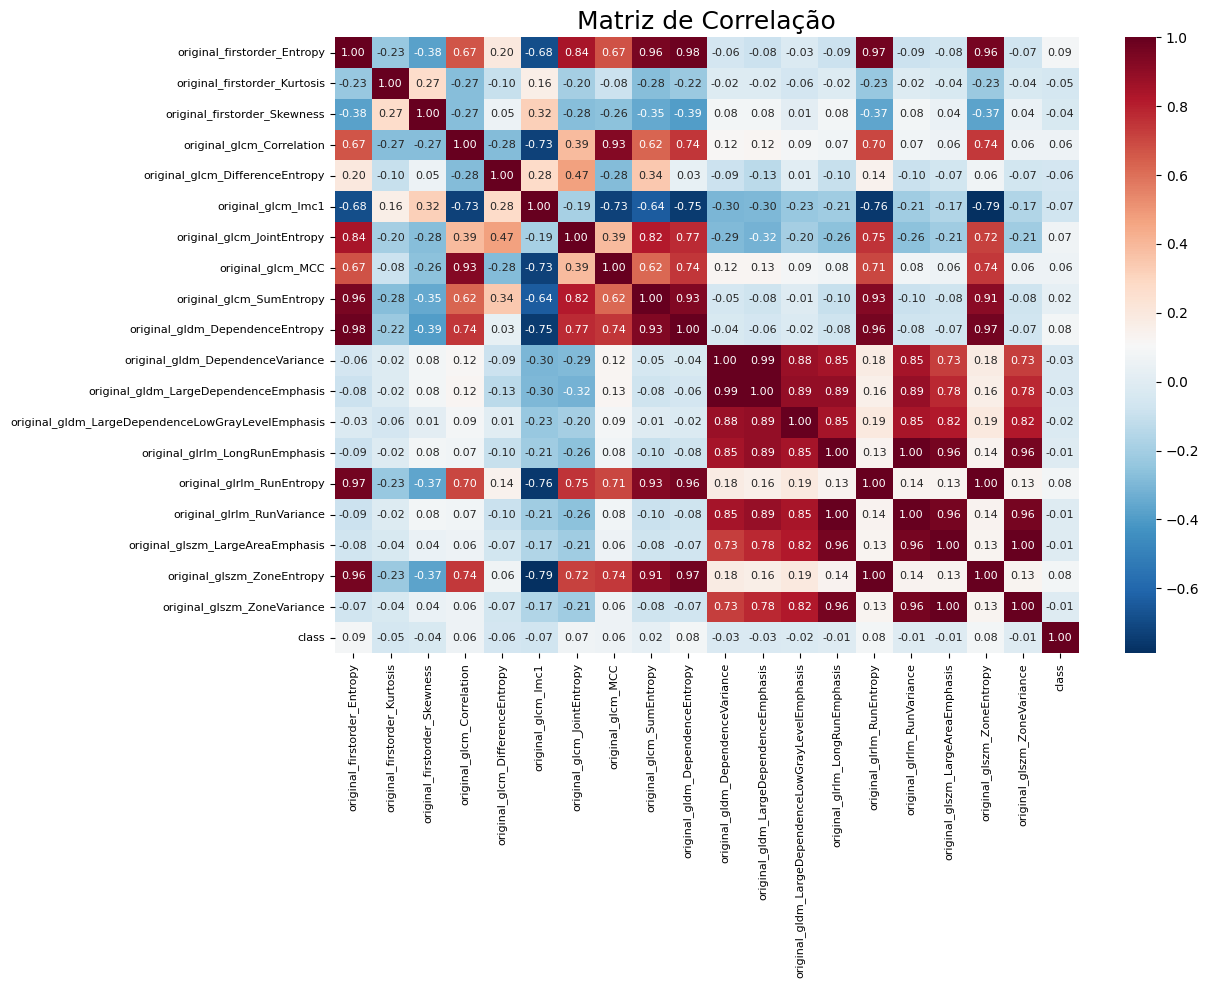

In [ ]:
# Visualizando o Mapa de Correlação entre as Variáveis
# Podemos notar que alguns atributos estão bastante correlacionados
# Enquanto 'class' possui baixa correlação com qualquer outro.

y_series = pd.Series(y, name='class')

mapa_corr = pd.concat([X, y_series], axis=1)

plt.figure(figsize=(12, 8))
sns.heatmap(mapa_corr.corr(),
            annot=True,
            fmt=".2f",
            cmap="RdBu_r",
            annot_kws={"size": 8})  # Ajusta o tamanho da fonte dentro das células

# Ajusta o tamanho das labels do eixo X e Y
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

plt.title("Matriz de Correlação", fontsize=18)  # Ajusta o tamanho do título
plt.show()

#### Utilizando a Correlação entre os Atributos

In [ ]:
# Não foi utilizado a técnica PCA, apenas para buscar manter umm pouco a
# interpretabilidade dos atributos

corr_matrix = X.corr().abs()

# Seleciona apenas a parte superior da matriz
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Buscando onde as correlações são > 0.95, para evitar redundâncias
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]


# Armazeno em X2, para o possibilidade de Testar se a correlação alta entre os atributos
# irá interferir negativamente na previsão dos modelos.
X2 = X.drop(columns=to_drop)

In [ ]:
# Novo Shape
X2.shape

(2018, 11)

In [ ]:
# Após remover os atributos redundantes, nota-se um aumento no Erro quadrátivo
# Veremos se isso será muito relevante para inferir o valor de Target.
model = LinearRegression()
scores = cross_val_score(model, X2, y, cv=5, scoring='neg_mean_squared_error')

# Convertendo o erro para positivo
mse_mean = -scores.mean()
print(f"MSE médio com atributos não correlacionados: {mse_mean:.4f}")

MSE médio com atributos não correlacionados: 0.3805


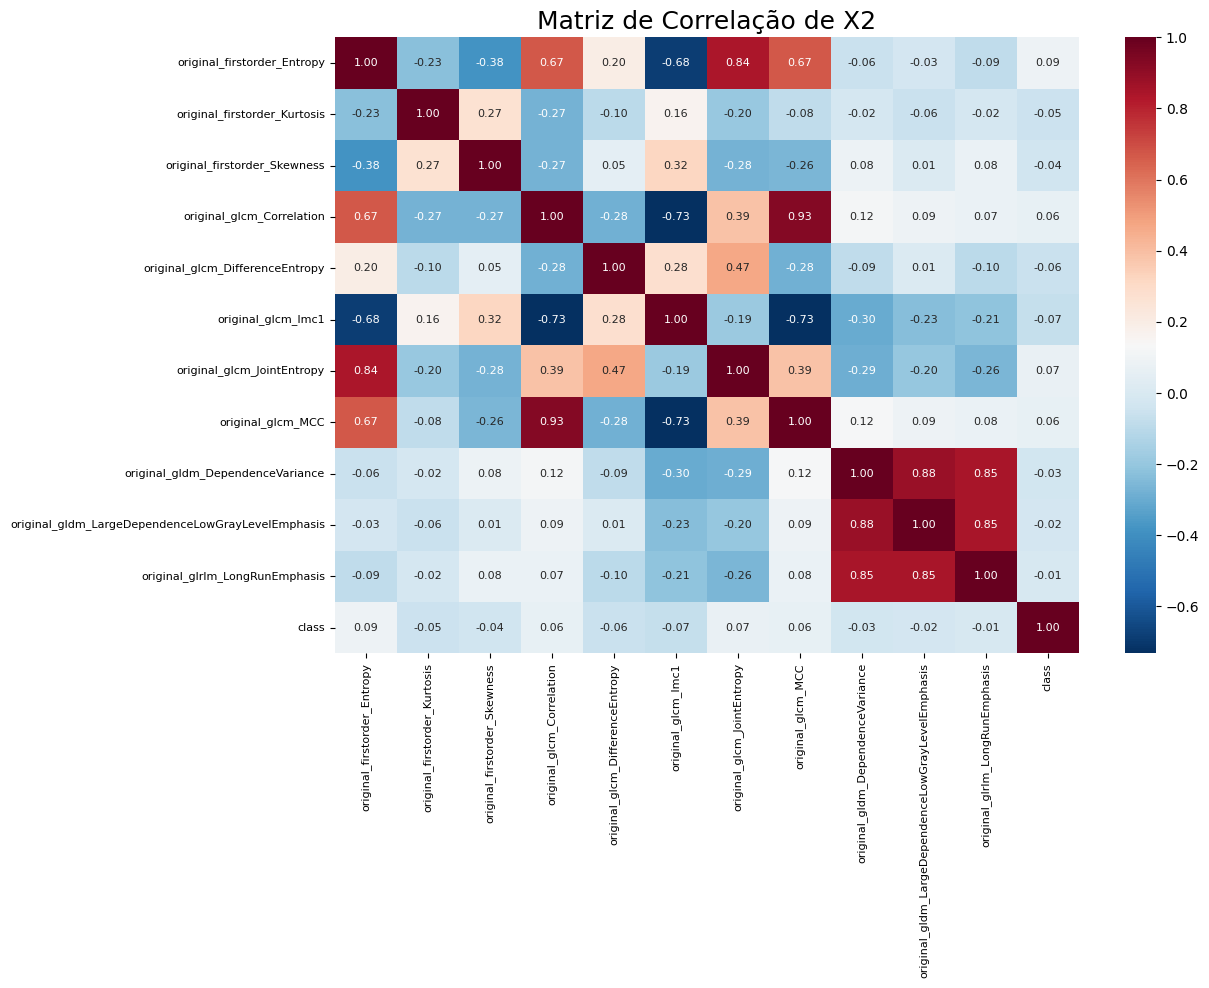

In [ ]:
# Novo mapa de correlação
y_series = pd.Series(y, name='class')

mapa_corr = pd.concat([X2, y_series], axis=1)

plt.figure(figsize=(12, 8))
sns.heatmap(mapa_corr.corr(),
            annot=True,
            fmt=".2f",
            cmap="RdBu_r",
            annot_kws={"size": 8})

# Ajusta o tamanho das labels do eixo X e Y
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

plt.title("Matriz de Correlação de X2", fontsize=18)
plt.show()

### **Comentário na Remoção dos Atributos**

- Houve uma grande redução dos Atributos do Dataset original - de 116 para 12, colaborando para uma maior compreensão dos dados como um todo. A redução de atributos fortemente correlacionados ( > 0.95) é responsável por evitar que haja redundância entre atributos.

- Toda a redução gera o aumento do desempenho para futuras análises e diminuição da complexidade dos algoritmos.

- A **Técnica RFE** foi escolhida com o intuito de eliminar variáveis irreleantes, além de se comportar bem com datasets com uma quantidade moderada de atributos e também por ser mais eficiente do que a técnica t-SNE.

- O **GridSearchCV** foi usado para realizar a validação cruzada e otimizar o número de atributos, testando cada conjunto deles.

- E o **K-Fold** foi usado para validar os resultados de forma mais confiável.

## Divisão dos Dados em treinamento e Teste com X2

In [ ]:
# split-out train/validation and test dataset
x_train, x_test, y_train, y_test = train_test_split(X2, y,
                                                    test_size=0.30,
                                                    random_state=0,
                                                    shuffle=True,
                                                    stratify=y)

In [ ]:
dupes = x_train.duplicated()
sum(dupes)

0

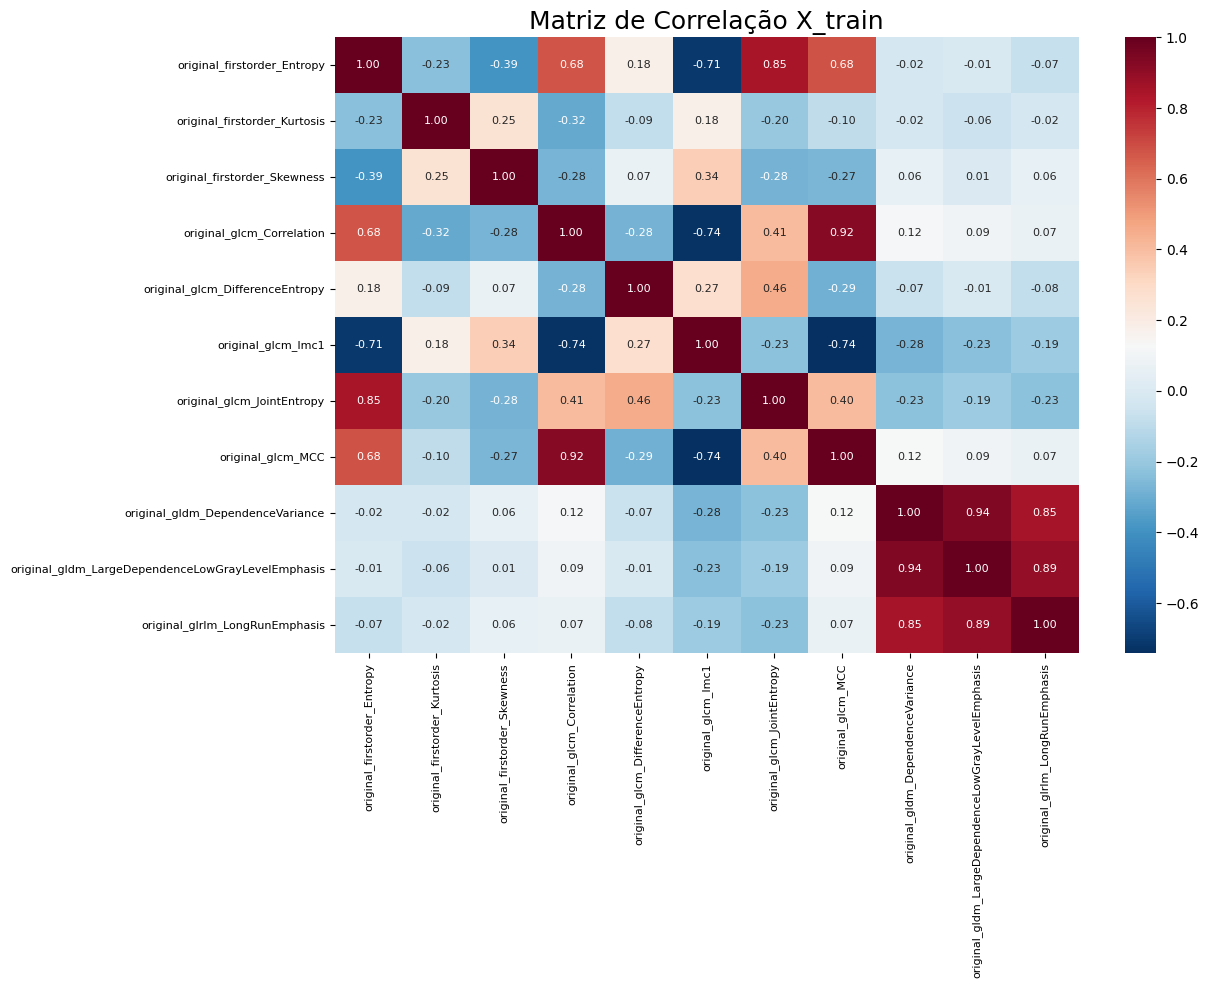

In [ ]:
# Visualizando o Mapa de Correlação entre as Variáveis
plt.figure(figsize=(12, 8))
sns.heatmap(x_train.corr(),
            annot=True,
            fmt=".2f",
            cmap="RdBu_r",
            annot_kws={"size": 8})  # Ajusta o tamanho da fonte dentro das células

# Ajusta o tamanho das labels do eixo X e Y
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

plt.title("Matriz de Correlação X_train", fontsize=18)  # Ajusta o tamanho do título
plt.show()

*Percebe-se uma boa semelhança entre os dados presentes no Treinamento e no Teste*

In [ ]:
display(x_train.shape)
x_train.describe()

(1412, 11)

,original_firstorder_Entropy,original_firstorder_Kurtosis,original_firstorder_Skewness,original_glcm_Correlation,original_glcm_DifferenceEntropy,original_glcm_Imc1,original_glcm_JointEntropy,original_glcm_MCC,original_gldm_DependenceVariance,original_gldm_LargeDependenceLowGrayLevelEmphasis,original_glrlm_LongRunEmphasis
count,1412.000000,1412.000000,1412.000000,1412.000000,1412.000000,1412.000000,1412.000000,1412.000000,1412.000000,1412.000000,1412.000000
mean,9.342484,3.039496,-0.088815,0.979256,6.119267,-0.331797,15.555646,0.983845,0.269314,0.193643,1.361128
std,0.624110,2.093875,0.661460,0.023946,0.461353,0.061733,0.748174,0.018320,0.925416,1.490728,3.404704
min,7.071295,1.583557,-4.161005,0.697943,4.460397,-0.525808,11.817434,0.844685,0.065144,0.000006,1.024690
25%,8.908336,2.205488,-0.483055,0.975822,5.794938,-0.372847,15.142302,0.980126,0.094104,0.000015,1.036113
50%,9.356595,2.571725,-0.100775,0.987179,6.143533,-0.333510,15.610527,0.990050,0.116615,0.000022,1.044756
75%,9.772415,3.116789,0.283682,0.993560,6.461014,-0.291466,16.066952,0.995321,0.156035,0.000035,1.060577
max,10.877354,34.692223,4.531112,0.999514,7.242260,-0.143334,17.271846,0.999716,13.291862,26.327018,84.075021


In [ ]:
display(x_test.shape)
x_test.describe()

(606, 11)

,original_firstorder_Entropy,original_firstorder_Kurtosis,original_firstorder_Skewness,original_glcm_Correlation,original_glcm_DifferenceEntropy,original_glcm_Imc1,original_glcm_JointEntropy,original_glcm_MCC,original_gldm_DependenceVariance,original_gldm_LargeDependenceLowGrayLevelEmphasis,original_glrlm_LongRunEmphasis
count,606.000000,606.000000,606.000000,606.000000,606.000000,606.000000,606.000000,606.000000,606.000000,606.000000,606.000000
mean,9.317546,3.020073,-0.081705,0.979594,6.100793,-0.332536,15.511711,0.983742,0.337608,0.213321,1.414822
std,0.611247,1.713889,0.653059,0.024223,0.478786,0.060367,0.797108,0.018956,1.184444,1.572367,2.410351
min,7.102862,1.527254,-2.905385,0.753636,4.464538,-0.526968,11.424372,0.846097,0.065270,0.000005,1.024705
25%,8.958012,2.222202,-0.482220,0.976205,5.806874,-0.371611,15.094065,0.980664,0.094790,0.000015,1.036400
50%,9.346887,2.596392,-0.111405,0.987855,6.121021,-0.333426,15.620209,0.990161,0.115829,0.000022,1.044474
75%,9.721996,3.237430,0.308538,0.993163,6.468380,-0.292917,16.060902,0.994982,0.155215,0.000035,1.060063
max,10.818276,18.341118,3.270368,0.999743,7.243594,-0.108821,17.048684,0.999799,11.859526,21.141919,31.057154


### Normalização do Treino e Teste

In [ ]:
# Por haver diferença de Escala entre os atributos, será aplicado uma Normalização

scaler = StandardScaler()

# Por praticidade, NESTE CASO, será feito em todas as colunas
# Aprendendo as estatísticas dos atributos e transformando o conjunto de treinamento
x_train = scaler.fit_transform(x_train)

# Transformando o conjunto de teste
x_test = scaler.transform(x_test)

In [ ]:
# Devolvendo para o formato Dataframe
x_train = pd.DataFrame(x_train, columns=scaler.feature_names_in_)
x_test = pd.DataFrame(x_test, columns=scaler.feature_names_in_)

In [ ]:
x_train.describe()

,original_firstorder_Entropy,original_firstorder_Kurtosis,original_firstorder_Skewness,original_glcm_Correlation,original_glcm_DifferenceEntropy,original_glcm_Imc1,original_glcm_JointEntropy,original_glcm_MCC,original_gldm_DependenceVariance,original_gldm_LargeDependenceLowGrayLevelEmphasis,original_glrlm_LongRunEmphasis
count,1.412000e+03,1.412000e+03,1412.000000,1.412000e+03,1.412000e+03,1.412000e+03,1.412000e+03,1.412000e+03,1.412000e+03,1.412000e+03,1.412000e+03
mean,-3.321234e-16,1.610295e-16,0.000000,-3.930127e-15,5.786998e-17,2.541247e-16,-5.107655e-16,-4.224509e-15,-2.264478e-17,2.767695e-17,2.767695e-17
std,1.000354e+00,1.000354e+00,1.000354,1.000354e+00,1.000354e+00,1.000354e+00,1.000354e+00,1.000354e+00,1.000354e+00,1.000354e+00,1.000354e+00
min,-3.640376e+00,-6.955788e-01,-6.158544,-1.175196e+01,-3.596940e+00,-3.143861e+00,-4.998220e+00,-7.598828e+00,-2.207039e-01,-1.299405e-01,-9.885070e-02
25%,-6.958751e-01,-3.984500e-01,-0.596226,-1.434305e-01,-7.032456e-01,-6.651932e-01,-5.526652e-01,-2.030889e-01,-1.893985e-01,-1.299344e-01,-9.549440e-02
50%,2.261808e-02,-2.234789e-01,-0.018087,3.310081e-01,5.261429e-02,-2.776076e-02,7.338007e-02,3.388210e-01,-1.650639e-01,-1.299294e-01,-9.295497e-02
75%,6.891155e-01,3.692670e-02,0.563343,5.975454e-01,7.410122e-01,6.535535e-01,6.836482e-01,6.266172e-01,-1.224526e-01,-1.299208e-01,-8.830658e-02
max,2.460166e+00,1.512218e+01,6.986910,8.462846e-01,2.434992e+00,3.053973e+00,2.294666e+00,8.665819e-01,1.407709e+01,1.753682e+01,2.430261e+01


In [ ]:
x_test.describe()

,original_firstorder_Entropy,original_firstorder_Kurtosis,original_firstorder_Skewness,original_glcm_Correlation,original_glcm_DifferenceEntropy,original_glcm_Imc1,original_glcm_JointEntropy,original_glcm_MCC,original_gldm_DependenceVariance,original_gldm_LargeDependenceLowGrayLevelEmphasis,original_glrlm_LongRunEmphasis
count,606.000000,606.000000,606.000000,606.000000,606.000000,606.000000,606.000000,606.000000,606.000000,606.000000,606.000000
mean,-0.039973,-0.009279,0.010754,0.014120,-0.040059,-0.011977,-0.058743,-0.005651,0.073825,0.013205,0.015776
std,0.979737,0.818815,0.987648,1.011920,1.038156,0.978227,1.065782,1.035095,1.280358,1.055138,0.708198
min,-3.589779,-0.722478,-4.259618,-9.425377,-3.587962,-3.162663,-5.523768,-7.521691,-0.220567,-0.129941,-0.098846
25%,-0.616251,-0.390464,-0.594963,-0.127460,-0.677365,-0.645165,-0.617162,-0.173717,-0.188657,-0.129934,-0.095410
50%,0.007057,-0.211694,-0.034163,0.359249,0.003803,-0.026397,0.086325,0.344879,-0.165914,-0.129930,-0.093038
75%,0.608300,0.094563,0.600934,0.580962,0.756983,0.630036,0.675559,0.608094,-0.123339,-0.129921,-0.088458
max,2.365473,7.310391,5.080234,0.855862,2.437885,3.613241,1.996285,0.871156,12.528767,14.057355,8.725148


## Modelos de Machine Learning

### Árvore de Decisão

COMENTE CASO USE O ARQUIVO DO DRIVE

In [ ]:
### GUIA
# class sklearn.tree.DecisionTreeClassifier(*, criterion='gini',
# splitter='best', max_depth=None, min_samples_split=2,
# min_samples_leaf=1, min_weight_fraction_leaf=0.0,
# max_features=None, random_state=None, max_leaf_nodes=None,
# min_impurity_decrease=0.0, class_weight=None,
# ccp_alpha=0.0, monotonic_cst=None)


# Dicionário com os Hiperparâmetros
search_space = {"criterion": ["gini","entropy"],
                "class_weight": ["balanced",None],
                "random_state" : [100],
                "max_depth": [None, 3, 5, 7,  10], # Ajuda a controlar o overfitting
                "min_samples_split": [2, 5, 10, 20, 100],
                "min_samples_leaf": [1, 2, 5, 10],
                "max_features": ['sqrt', 'log2', None]
                }

# Criando outro Grid Search, usando StratifiedKFold, agora, a fim de manter um balanceamento
# de classe em cada agrupamento
kfold = StratifiedKFold(n_splits=5,random_state=100,shuffle=True)

grid = GridSearchCV(DecisionTreeClassifier(),
                    param_grid=search_space,
                    cv=kfold,
                    scoring='accuracy',
                    return_train_score=True,
                    n_jobs=-1)

# fit grid search
%time grid.fit(x_train, y_train)

# Salvando o resultado em um arquivo
joblib.dump(grid, 'decision_tree.pkl')

ALTERAR O MODO DE LEITURA, CASO USE O DRIVE

In [ ]:
# Leitura do Arquivo
grid = joblib.load('decision_tree.pkl')

# # Leitura do Arquivo no Drive
# grid = joblib.load(f'{path_drive}/decision_tree.pkl')

# Obtem os melhores estimadores
print("Melhores estimadores:", grid.best_params_)

print("Score da aprendizagem", np.abs(grid.best_score_))



Melhores estimadores: {'class_weight': None, 'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 100, 'random_state': 100}
Score da aprendizagem 0.5757637270380672


In [ ]:
# Predições
predictions = grid.predict(x_test)

# Acurácia sobre a base test
accuracy = accuracy_score(y_test, predictions)
print("Acurácia do teste via accuracy_score:", accuracy)

Acurácia do teste via accuracy_score: 0.5577557755775577


In [ ]:
print(5* " " + "Relatório de Classificação com Base Teste")
print(classification_report(y_test, predictions, labels=[0,1], target_names=['Benigno', 'Maligno']))
print("*"*40)

     Relatório de Classificação com Base Teste
              precision    recall  f1-score   support

     Benigno       0.58      0.67      0.62       330
     Maligno       0.52      0.42      0.46       276

    accuracy                           0.56       606
   macro avg       0.55      0.55      0.54       606
weighted avg       0.55      0.56      0.55       606

****************************************


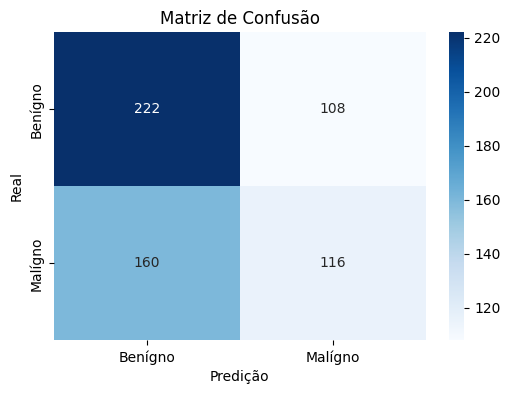

In [ ]:
cm = confusion_matrix(y_test, predictions)
cm = pd.DataFrame(cm, columns=['Benígno', 'Malígno'], index=['Benígno', 'Malígno'])

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
plt.xlabel('Predição')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()

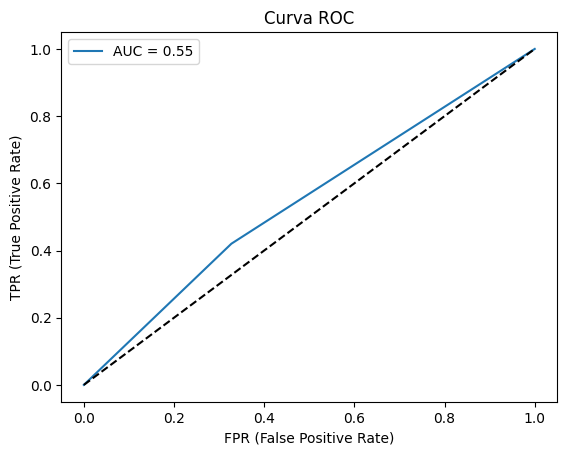

In [ ]:
# Curva ROC
fpr, tpr, thresholds = roc_curve(y_test, predictions)
auc = roc_auc_score(y_test, predictions)

plt.figure()
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # linha aleatória
plt.xlabel('FPR (False Positive Rate)')
plt.ylabel('TPR (True Positive Rate)')
plt.title('Curva ROC')
plt.legend()
plt.show()

In [ ]:
def analise(TP, FP, FN, TN):
    # Sensitivity, hit rate, recall, or true positive rate
    TPR = TP/(TP+FN)
    print("Sensitivity: ", TPR)
    # Specificity or true negative rate
    TNR = TN/(TN+FP)
    print("Specificity: ", TNR)
    # Precision or positive predictive value
    PPV = TP/(TP+FP)
    print("Precision(positive predictive value): ", PPV)
    # Negative predictive value
    NPV = TN/(TN+FN)
    print("Negative predictive value: ",NPV)
    print("*"*40)
    AUC = roc_auc_score(y_test, predictions)
    print("ROC AUC: ", AUC)
    f1 = f1_score(y_test, predictions)
    print("F1 Score: ", f1)

In [ ]:
# Print dos dados
analise(cm.iloc[0, 0], cm.iloc[0, 1], cm.iloc[1, 0], cm.iloc[1, 1])


Sensitivity:  0.581151832460733
Specificity:  0.5178571428571429
Precision(positive predictive value):  0.6727272727272727
Negative predictive value:  0.42028985507246375
****************************************
ROC AUC:  0.5465085638998683
F1 Score:  0.464


### Perceptron Multicamadas

In [ ]:
# Melhores Testes | Acurárica
# (512, 32, 8, 32) = 0.62
# (512, 32, 32, 16) = 0.62
# (512, 32, 64,8) = 0.61
# (512, 32, 32) = 0.61

mlp = MLPClassifier(
    hidden_layer_sizes=(512, 32, 8, 32),
    activation='relu',
    max_iter=500,
    random_state=42,
    early_stopping=True,       # Permite a interrupção antecipada
    validation_fraction=0.2,   # Usa 20% do treino como validação
    n_iter_no_change=10,       # Interrompe depois de 10 épocas sem melhora
    verbose=True,              # Mostra o progresso do treinamento
)

# Fita o modelo
%time mlp.fit(x_train, y_train)

# Salvar o modelo ajustado para fazer uso novamente
joblib.dump(mlp, 'mlp_result1.pkl')

Iteration 1, loss = 0.74783573
Validation score: 0.448763
Iteration 2, loss = 0.70641487
Validation score: 0.505300
Iteration 3, loss = 0.68853719
Validation score: 0.540636
Iteration 4, loss = 0.68452218
Validation score: 0.554770
Iteration 5, loss = 0.67947702
Validation score: 0.554770
Iteration 6, loss = 0.67489015
Validation score: 0.568905
Iteration 7, loss = 0.67156009
Validation score: 0.544170
Iteration 8, loss = 0.66812257
Validation score: 0.544170
Iteration 9, loss = 0.66436258
Validation score: 0.537102
Iteration 10, loss = 0.65971763
Validation score: 0.572438
Iteration 11, loss = 0.65495866
Validation score: 0.561837
Iteration 12, loss = 0.65185011
Validation score: 0.572438
Iteration 13, loss = 0.64816387
Validation score: 0.572438
Iteration 14, loss = 0.64499365
Validation score: 0.568905
Iteration 15, loss = 0.64197699
Validation score: 0.597173
Iteration 16, loss = 0.63962077
Validation score: 0.593640
Iteration 17, loss = 0.63665613
Validation score: 0.604240
Iterat

['mlp_result1.pkl']

In [ ]:
# Leitura do Arquivo
mlp = joblib.load('mlp_result1.pkl')

predictions = mlp.predict(x_test)

accuracy = round(accuracy_score(y_test, predictions),2)
print("Acurácia do teste via accuracy_score:", accuracy )

Acurácia do teste via accuracy_score: 0.62


In [ ]:
print(5* " " + "Relatório de Classificação com Base Teste")
print(classification_report(y_test, predictions, labels=[0,1], target_names=['Benigno', 'Maligno']))
print("*"*40)

     Relatório de Classificação com Base Teste
              precision    recall  f1-score   support

     Benigno       0.63      0.72      0.68       330
     Maligno       0.60      0.50      0.55       276

    accuracy                           0.62       606
   macro avg       0.62      0.61      0.61       606
weighted avg       0.62      0.62      0.62       606

****************************************


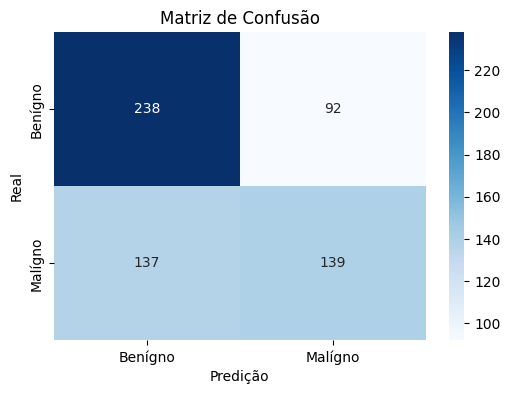

In [ ]:
cm = confusion_matrix(y_test, predictions)
cm = pd.DataFrame(cm, columns=['Benígno', 'Malígno'], index=['Benígno', 'Malígno'])

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
plt.xlabel('Predição')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()

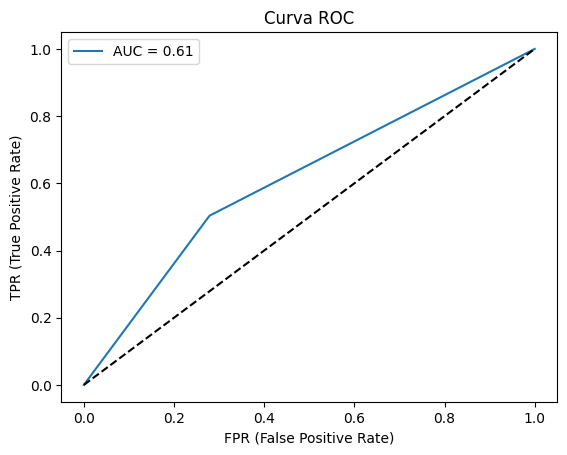

In [ ]:
# Curva ROC
fpr, tpr, thresholds = roc_curve(y_test, predictions)
auc = roc_auc_score(y_test, predictions)

plt.figure()
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # linha aleatória
plt.xlabel('FPR (False Positive Rate)')
plt.ylabel('TPR (True Positive Rate)')
plt.title('Curva ROC')
plt.legend()
plt.show()

In [ ]:
# Print dos dados
analise(cm.iloc[0, 0], cm.iloc[0, 1], cm.iloc[1, 0], cm.iloc[1, 1])

Sensitivity:  0.6346666666666667
Specificity:  0.6017316017316018
Precision(positive predictive value):  0.7212121212121212
Negative predictive value:  0.5036231884057971
****************************************
ROC AUC:  0.6124176548089593
F1 Score:  0.5483234714003945


### Conclusão

O modelo criado, envolvendo Perceptron de Multicamadas, se mostrou superior à Árvore de Decisão no que se refere a todos os aspectos. Mesmo que seus resultados ainda deixem a desejar.

Analisando a Matriz de Confusão dos dois modelos gerados e o "Relatório de Classificação com Base Teste", percebe-se que ocorreu uma melhora no uso do MLP.

Houve um aumento na acurácia de 6%, houve também um aumento de pelo menons 5 pontos percentuais na precisão e na revocação das duas classes - Benigno e Maligno.

O f1-score, teve uma alta relevante de aproximadamente 8% - saindo de 0.464 para 0.548, o que indica uma melhora no equilíbrio entre a precisão e o recall. Em outras palavras, posso dizer que o modelo está errando menos tanto nos falsos positivos quanto nos falsos negativos.

O aumento de aproximados 5% na Área sob a Curva ROC indica que o modelo está conseguindo classificar melhor os exemplos positivos acima dos negativos. Contudo, os valores ainda são muito baixos, mostrando um poder de interpretação muito baixo, chegando a quase ser aleatório.

****************************************

Acredito que uma das razões para o modelo MLP ter se saído melhor é porquê podemos ajustar bastante os parâmetros, além dele ser um modelo não linear, o que pode fazer com que ele aprenda relações mais complexas e interações sutis entre variáveis.

Já Árvore de Decisão, por ser baseada em regras hierárquicas, pode ser limitada para certos padrões nos dados.

Outro fator que pode ter sido importante para o desempenho do MLP foi pelo fato dos dados envolverem relações numéricas. Em problemas com  variáveis categóricas, as árvores poderiam ter sido melhores.


## Algoritmos

*Reaproveitamos os dados tratados da atividade anterior e Normalizando*

In [ ]:
# X2 possui os valores de dimensão reduzidos, tratatdos, e sem o Target.
# Por isso, será usado para a resolução desta atividade

# Normalizando os dados para que atributos de maior escala não dominem o Dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X2)

data_x = pd.DataFrame(X_scaled, columns=scaler.feature_names_in_)
data_y = y.copy()

### Algoritmo K-means

In [ ]:
data_x.describe()

,original_firstorder_Entropy,original_firstorder_Kurtosis,original_firstorder_Skewness,original_glcm_Correlation,original_glcm_DifferenceEntropy,original_glcm_Imc1,original_glcm_JointEntropy,original_glcm_MCC,original_gldm_DependenceVariance,original_gldm_LargeDependenceLowGrayLevelEmphasis,original_glrlm_LongRunEmphasis
count,2.018000e+03,2.018000e+03,2.018000e+03,2.018000e+03,2.018000e+03,2.018000e+03,2.018000e+03,2.018000e+03,2.018000e+03,2.018000e+03,2.018000e+03
mean,-1.464746e-15,-6.337844e-17,-3.521024e-18,-2.753441e-15,4.577332e-17,-3.521024e-17,4.225229e-17,-2.711189e-15,1.232359e-17,-7.042049e-18,7.042049e-18
std,1.000248e+00,1.000248e+00,1.000248e+00,1.000248e+00,1.000248e+00,1.000248e+00,1.000248e+00,1.000248e+00,1.000248e+00,1.000248e+00,1.000248e+00
min,-3.650686e+00,-7.583160e-01,-6.186044e+00,-1.171680e+01,-3.544111e+00,-3.180412e+00,-5.396686e+00,-7.518877e+00,-2.224250e-01,-1.317175e-01,-1.123493e-01
25%,-6.653236e-01,-4.140688e-01,-6.012221e-01,-1.391624e-01,-6.792471e-01,-6.647113e-01,-5.480359e-01,-1.961852e-01,-1.936680e-01,-1.317110e-01,-1.086766e-01
50%,2.838979e-02,-2.309539e-01,-2.891016e-02,3.365181e-01,5.777510e-02,-2.397044e-02,9.645261e-02,3.402837e-01,-1.718066e-01,-1.317062e-01,-1.059903e-01
75%,6.710437e-01,6.443814e-02,5.677927e-01,5.875149e-01,7.487571e-01,6.534640e-01,6.846581e-01,6.163628e-01,-1.325076e-01,-1.316975e-01,-1.009193e-01
max,2.487373e+00,1.593669e+01,7.011189e+00,8.487675e-01,2.422032e+00,3.641277e+00,2.266346e+00,8.638623e-01,1.287159e+01,1.724625e+01,2.635290e+01


*Método do Cotovelo para identificar o melhor valor de K*

In [ ]:
# WCSS: Lista para armazenar a inércia (soma das distâncias ao centro do cluster)
# WCSS = Σ Σ (distância(ponto, centroide))² distância é a euclidiana

wcss = []
K_range = range(1, 11) # 10 opções para K

for i in K_range:
    kmeans = KMeans(n_clusters=i, random_state=69)
    kmeans.fit(data_x)
    wcss.append(kmeans.inertia_)

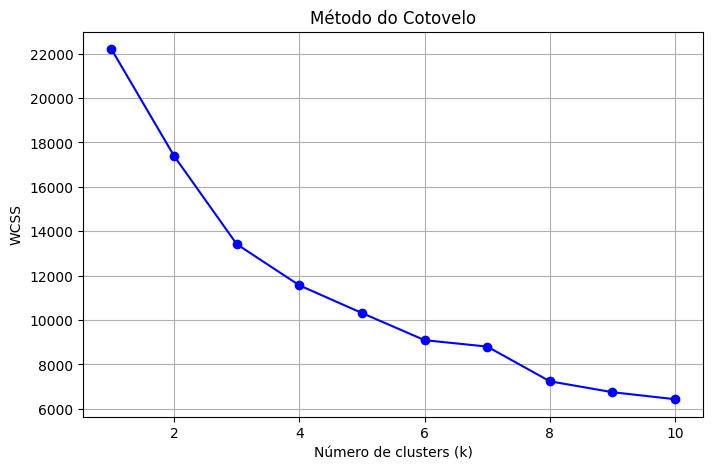

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(K_range, wcss, 'bo-')
plt.xlabel('Número de clusters (k)')
plt.ylabel('WCSS')
plt.title('Método do Cotovelo')
plt.grid(True)
plt.show()

*Pontos que merecem Destaques: 6, 8, 10*

#### Agrupamento com 6 Clusters

In [ ]:
kmeans_model = KMeans(n_clusters=6, random_state=69)
lesoes_dist = kmeans_model.fit_transform(data_x)
print(lesoes_dist)

[[ 9.04030328  7.03011989 16.18710267  4.23524726  8.61559243 10.28319743]
 [ 2.30395402  2.77156678 13.86558236  5.92665285  4.11797842  8.45989984]
 [ 3.55088595  4.46698252 13.21422219  6.53578429  2.40417602  8.07999917]
 ...
 [ 0.87980435  3.10054718 13.57402485  6.34853848  2.63552882  8.04024035]
 [ 2.10588847  1.02634185 13.71277384  4.44223155  2.91236215  7.63044519]
 [ 2.05952862  3.3925108  13.29062661  6.35040597  2.07080373  7.50793712]]


*Avaliação da qualidade do agrupamento gerado*

In [ ]:
s = silhouette_score(data_x, kmeans_model.labels_, metric='euclidean')

dbs = davies_bouldin_score(data_x, kmeans_model.labels_)

calinski = calinski_harabasz_score(data_x, kmeans_model.labels_)

print("Silhouette Score: ", s)
print("Davies Bouldin Score: ", dbs)
print("calinski Harabasz Score: ", calinski)

Silhouette Score:  0.2456265937840716
Davies Bouldin Score:  1.0789023703255765
calinski Harabasz Score:  580.0310801639719


In [ ]:
labels = kmeans_model.labels_
pd.crosstab(np.array(labels), data_y,
          colnames=["Lesões"],rownames=["cluster"])

Lesões,0,1
cluster,,
0,354,369
1,307,220
2,14,9
3,107,69
4,297,241
5,21,10


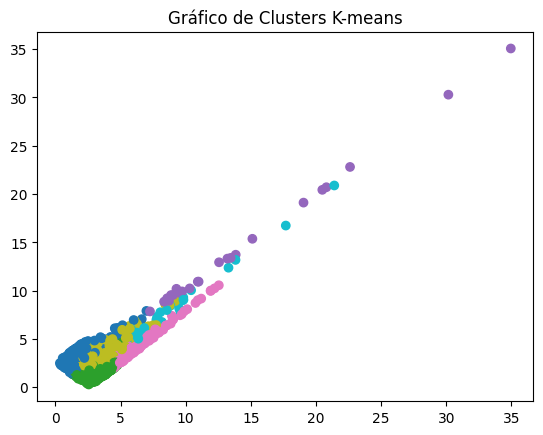

In [ ]:
X = lesoes_dist[:,0]
y = lesoes_dist[:,1]

# Visualização dos resultados
plt.scatter(X,y,c=labels,cmap="tab10")
plt.title('Gráfico de Clusters K-means')

plt.show()

#### Agrupamento com 8 Clusters

In [ ]:
kmeans_model = KMeans(n_clusters=8, random_state=69)
lesoes_dist = kmeans_model.fit_transform(data_x)
print(lesoes_dist)

[[ 9.27581419  7.88139756 11.56886568 ... 25.87650013 10.28319743
   8.64160626]
 [ 2.5127778   2.16982359  7.59385644 ... 24.66952362  8.45989984
   4.11250663]
 [ 3.4461559   4.12995177  7.19834036 ... 24.07925295  8.07999917
   2.36901097]
 ...
 [ 0.66641097  2.21013012  7.1675167  ... 24.48453347  8.04024035
   2.60343636]
 [ 2.42418098  0.78152979  7.46811572 ... 24.53267766  7.63044519
   2.91655964]
 [ 2.01807979  2.70745649  6.93839729 ... 24.25238937  7.50793712
   2.05320802]]


In [ ]:
s = silhouette_score(data_x, kmeans_model.labels_, metric='euclidean')

dbs = davies_bouldin_score(data_x, kmeans_model.labels_)

calinski = calinski_harabasz_score(data_x, kmeans_model.labels_)

print("Silhouette Score: ", s)
print("Davies Bouldin Score: ", dbs)
print("calinski Harabasz Score: ", calinski)

Silhouette Score:  0.22141079818618864
Davies Bouldin Score:  1.0753406668687602
calinski Harabasz Score:  593.2778172763302


In [ ]:
labels = kmeans_model.labels_
pd.crosstab(np.array(labels), data_y,
          colnames=["Lesões"],rownames=["cluster"])

Lesões,0,1
cluster,,
0,259,264
1,248,260
2,27,12
3,53,41
4,207,102
5,3,3
6,21,10
7,282,226


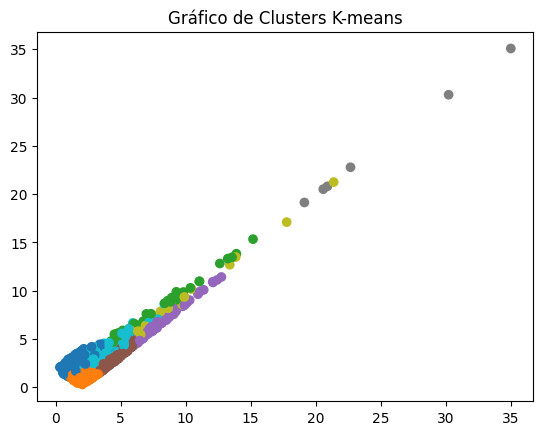

In [ ]:
X = lesoes_dist[:,0]
y = lesoes_dist[:,1]

# Visualização dos resultados
plt.scatter(X,y,c=labels,cmap="tab10")
plt.title('Gráfico de Clusters K-means')

plt.show()

#### Agrupamento com 10 Clusters

In [ ]:
kmeans_model = KMeans(n_clusters=10, random_state=69)
lesoes_dist = kmeans_model.fit_transform(data_x)
print(lesoes_dist)

[[ 9.21313222  7.72800756 11.56886568 ...  8.91471485  9.16758795
   5.86594415]
 [ 2.09074372  2.28539902  7.59385644 ...  3.67302225  3.51284535
   3.81515049]
 [ 4.01873054  4.17227495  7.19834036 ...  2.5471913   2.29382498
   5.20796503]
 ...
 [ 1.18401843  2.37835258  7.1675167  ...  1.99089677  1.27587416
   4.33947243]
 [ 2.25648475  0.74543641  7.46811572 ...  2.63694089  2.98979195
   2.18537913]
 [ 2.34167883  2.81757194  6.93839729 ...  1.35224292  2.39209663
   4.50588046]]


In [ ]:
s = silhouette_score(data_x, kmeans_model.labels_, metric='euclidean')

dbs = davies_bouldin_score(data_x, kmeans_model.labels_)

calinski = calinski_harabasz_score(data_x, kmeans_model.labels_)

print("Silhouette Score: ", s)
print("Davies Bouldin Score: ", dbs)
print("calinski Harabasz Score: ", calinski)

Silhouette Score:  0.21662018898149663
Davies Bouldin Score:  1.1049645902385756
calinski Harabasz Score:  546.9004749927174


In [ ]:
labels = kmeans_model.labels_
pd.crosstab(np.array(labels), data_y,
          colnames=["Lesões"],rownames=["cluster"])

Lesões,0,1
cluster,,
0,200,190
1,215,218
2,27,12
3,53,39
4,110,89
5,3,3
6,22,10
7,214,183
8,85,93


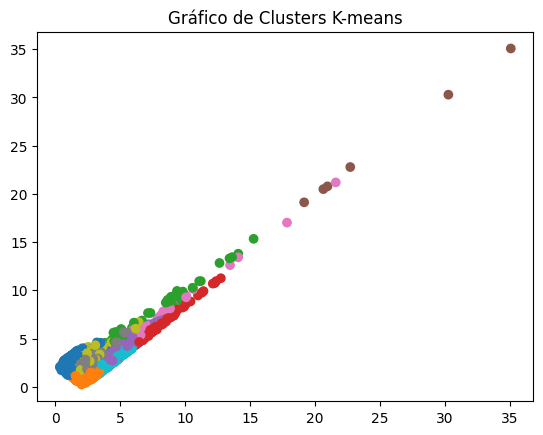

In [ ]:
X = lesoes_dist[:,0]
y = lesoes_dist[:,1]

# Visualização dos resultados
plt.scatter(X,y,c=labels,cmap="tab10")
plt.title('Gráfico de Clusters K-means')

plt.show()

#### Testando Agrupamento com 2 (APENAS POR CURIOSIDADE)

In [ ]:
kmeans_model = KMeans(n_clusters=2, random_state=69)
lesoes_dist = kmeans_model.fit_transform(data_x)
print(lesoes_dist)

[[8.6247117  5.88382814]
 [2.69923585 4.50527492]
 [3.13285185 5.04237339]
 ...
 [1.41445125 4.66258663]
 [1.86904557 2.89967165]
 [1.81066658 4.609364  ]]


In [ ]:
s = silhouette_score(data_x, kmeans_model.labels_, metric='euclidean')

dbs = davies_bouldin_score(data_x, kmeans_model.labels_)

calinski = calinski_harabasz_score(data_x, kmeans_model.labels_)

print("Silhouette Score: ", s)
print("Davies Bouldin Score: ", dbs)
print("calinski Harabasz Score: ", calinski)

Silhouette Score:  0.33039024560875074
Davies Bouldin Score:  1.3363384636922317
calinski Harabasz Score:  557.3775793844824


In [ ]:
c, coph_dists = cophenet(sch.linkage(data_x, method='ward'), pdist(data_x))
print("Cophenetic Correlation Coefficient:", c)

Cophenetic Correlation Coefficient: 0.3878475377329376


In [ ]:
labels = kmeans_model.labels_
pd.crosstab(np.array(labels), data_y,
          colnames=["Lesões"],rownames=["cluster"])

Lesões,0,1
cluster,,
0,770,724
1,330,194


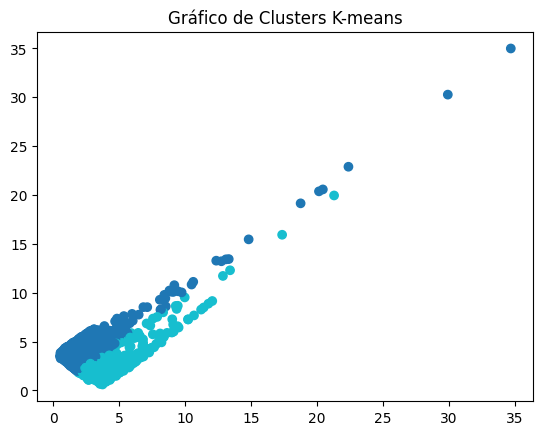

In [ ]:
X = lesoes_dist[:,0]
y = lesoes_dist[:,1]

# Visualização dos resultados
plt.scatter(X,y,c=labels,cmap="tab10")
plt.title('Gráfico de Clusters K-means')

plt.show()

Cria um objeto PCA com 2 componentes, apenas para visualização GRÁFICA de
dois labels (APENAS POR CURIOSIDADE)

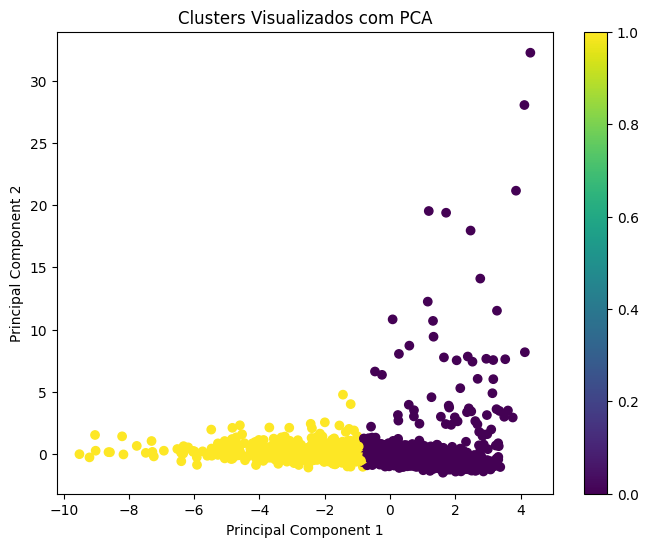

In [ ]:
from sklearn.decomposition import PCA

X = data_x.to_numpy()

pca = PCA(n_components=2)

# Ajuste o PCA aos dados
pca.fit(X)

# Transforme os dados
X_pca = pca.transform(X)

# Crie um DataFrame com as componentes principais
df_pca = pd.DataFrame(data = X_pca, columns = ['PC1', 'PC2'])

# Adicione a coluna de clusters ao DataFrame (assumindo que seus clusters estão em uma variável chamada 'clusters')
df_pca['cluster'] = labels

# Crie o gráfico de dispersão
plt.figure(figsize=(8, 6))
plt.scatter(df_pca['PC1'], df_pca['PC2'], c=df_pca['cluster'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clusters Visualizados com PCA')
plt.colorbar()
plt.show()

#### Conclusão para o valor de K

Com os resultados coletatos a partir das atribuições de possíveis valores de K (6, 8, 10), nenhum dos escolhidos se destacou. Apenas podemos selecionar o menos pior, que foi k = 6.

O modelo com k=6 mostrou uma melhor separação entre clusters - Silhouette = 0.2456, mostrando um leve aumento em Davies-Bouldin em relação a k=8. Além disso, houve uma pequena perda com relação a pontuação de Calinski Harabasz, apenas 13 pontos.

Podemos dizer que o modelo com k=10, pode estar superdividindo os dados, gerando clusters artificiais e pouco interpretáveis, por essa conclusão, ele foi descartado.

Justificativa para o uso das Métricas:

- A métrica Silhouette Score foi usada porque ela mede o quão semelhante cada ponto está ao seu próprio cluster em comparação com os demais. Seu valor próximo a 1 indica que os clusters estão bem separados uns dos outros e com baixa dispersão interna.

- Já a métrica Davies-Bouldin foi usada porque ela calcula a média da similaridade entre cada cluster e o mais semelhante a ele, considerando forma e distância. Um valor menor significa que os clusters estão mais separados e menos dispersos, o que é muito bom.

- E a métrica Calinski-Harabasz foi usada porque ela avalia a separação entre os clusters (quanto maior, melhor) e a compactação interna deles (quanto menor, melhor). Isso significa que os clusters estão densos e bem separados uns dos outros. Quanto maior, mais próximo da solução ideal.


### Agrupamento Hierárquico

#### Utilizando o método **Ward**

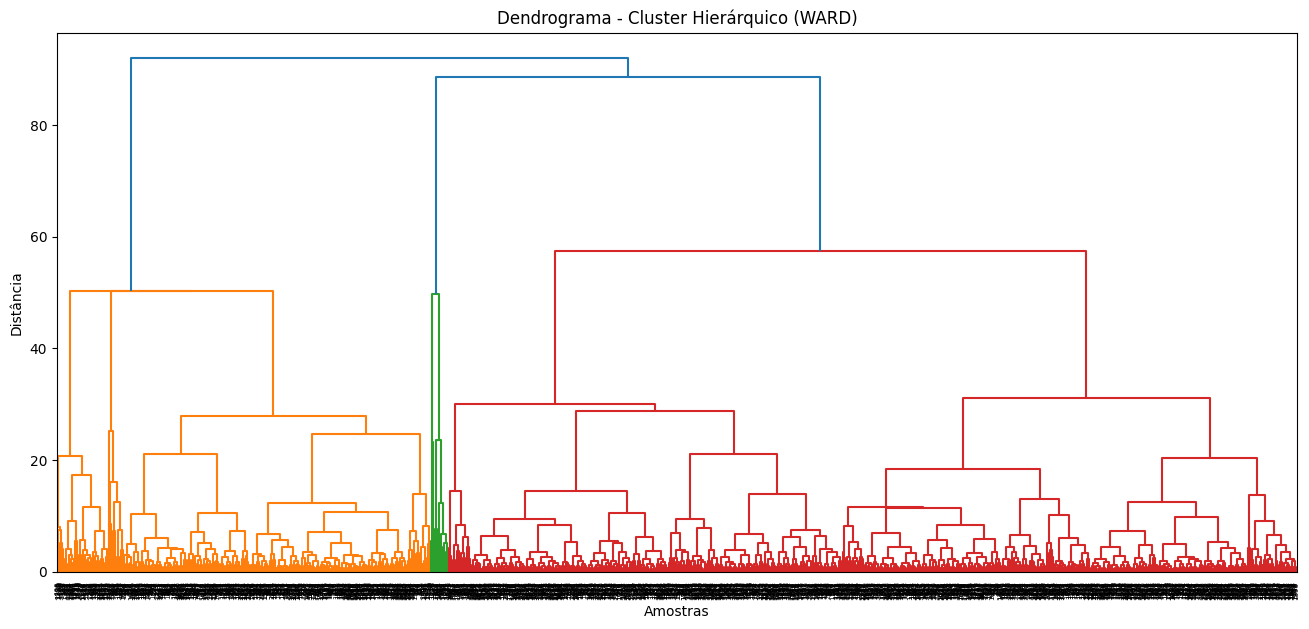

In [ ]:
linked = linkage(X_scaled, method='ward')  # método 'ward' minimiza variância intra-grupo

plt.figure(figsize=(16, 7))
dendrogram(linked)
plt.title('Dendrograma - Cluster Hierárquico (WARD)')
plt.xlabel('Amostras')
plt.ylabel('Distância')
plt.show()

Cores indentificadas no Dendograma (da esqurda para a direita): \
Azul \
Laranja, Verde, Vermelho.

In [ ]:
# ‘ward’ minimizes the variance of the clusters being merged.
hc = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='ward')
clusters = hc.fit_predict(X_scaled)

In [ ]:
silhouette_avg = silhouette_score(X_scaled, clusters)
print("Silhouette Score:", silhouette_avg)

db_index = davies_bouldin_score(X_scaled, clusters)
print("Davies-Bouldin Index:", db_index)

ch_index = calinski_harabasz_score(X_scaled, clusters)
print("Calinski-Harabasz Index:", ch_index)


Silhouette Score: 0.18980533455082188
Davies-Bouldin Index: 1.2826857847267168
Calinski-Harabasz Index: 530.5595926179999


#### Utilizando o método **Complete**

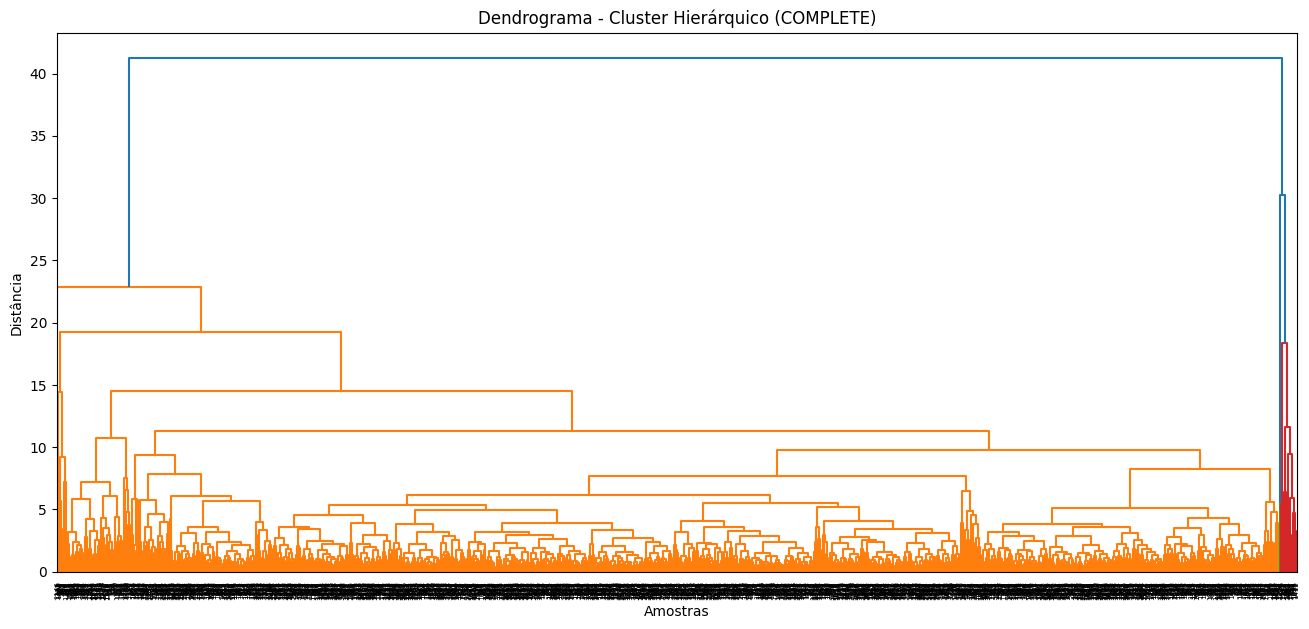

In [ ]:
linked = linkage(X_scaled, method='complete')
plt.figure(figsize=(16, 7))
dendrogram(linked)
plt.title('Dendrograma - Cluster Hierárquico (COMPLETE)')
plt.xlabel('Amostras')
plt.ylabel('Distância')
plt.show()

Cores indentificadas no Dendograma (da esqurda para a direita): \
Azul \
Laranja, Verde (linha bem pequena), Vermelho.

In [ ]:
# ‘complete’  linkage uses the maximum distances between all observations of the two sets.
hc = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='complete')
clusters = hc.fit_predict(X_scaled)

In [ ]:
silhouette_avg = silhouette_score(X_scaled, clusters)
print("Silhouette Score:", silhouette_avg)

db_index = davies_bouldin_score(X_scaled, clusters)
print("Davies-Bouldin Index:", db_index)

ch_index = calinski_harabasz_score(X_scaled, clusters)
print("Calinski-Harabasz Index:", ch_index)


Silhouette Score: 0.7007217020790437
Davies-Bouldin Index: 0.5303160587447552
Calinski-Harabasz Index: 216.938266742721


#### **Conclusão para o Método de Linkage**

A partir das métricas usadas, o método usando linkage = 'complete' foi o que mais se mostrou superior.

As métricas Silhouette e Davies-Bouldin se mostram mais robustas para avaliar a qualidade dos clusters, gerando um resultado de - 0.70 contra 0.19 e 0.53 contra 1.28, respectivamente para cada métrica, sendo o primeiro
valor referente a 'complete' e o segundo a 'ward'.

Apesar do índice Calinski-Harabasz de 'complete' ser inferior ao modelo com linkage 'ward', a qualidade estrutural dos clusters foi superior.

### **Conclusão entre K-means e Agrupamento Hierárquico**

Entre o melhor modelo de agrupamento hierárquico testado(com linkage 'complete'), e o melhor modelo de K-Means (k=6), o **agrupamento hierárquico** demonstrou ser mais eficaz, principalmente por ter conseguido formar clusters mais definidos (Conclusão obtida pelo que foi mostrado pelas métricas utilizadas).


|      Modelo         | Silhouette   | DBI       | CH         |
| ------------------- | ------------ | --------- | ---------- |
| K-Means (k=6)       | 0.246        | 1.079     | **580.03** |
| Hierárquico 'complete' | **0.701** | **0.530** | 216.94     |
